In [78]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from src.encoders_decoders import *

In [79]:
N = 20
#Define data distribution
x_data = torch.distributions.uniform.Uniform(0,10).sample((500,))[:,None]
x_sorted,indices = x_data.sort(dim=0)
x_min,x_max = x_sorted[0,:].item(),x_sorted[-1,:].item() 

In [85]:
enc = BernoulliEncoder(N,x_min,x_max)
enc.log_sigmas = torch.log(0.5*torch.ones(N)[None,:])
inv_sigmas = 1/(2*torch.exp(2*enc.log_sigmas)).transpose(0,1)
phi0 = torch.cat((2*enc.cs.transpose(0,1)*inv_sigmas,-inv_sigmas),dim=1)
dec = GaussianDecoder(phi0)

In [297]:
p_r_x = enc(x_sorted)
eps = torch.rand(500,10,N)
r = torch.sigmoid((torch.log(eps) - torch.log(1-eps) + p_r_x[:,None,:])/tau)
mu_dec,sigma_dec = dec(r)
inv_sigma2 = 1/sigma_dec**2
mp = mu_dec*inv_sigma2

In [245]:
def distortion(x,encoder,decoder,lat_samp=10,tau=0.5):
    p_r_x = encoder(x)
    eps = torch.rand(500,10,N)
    r = torch.sigmoid((torch.log(eps) - torch.log(1-eps) + p_r_x[:,None,:])/tau)
    mu_dec,sigma_dec = dec(r)
    return d

In [253]:
eps = torch.rand(10,500,N)
tau=0
r = torch.sigmoid((torch.log(eps) - torch.log(1-eps) + p_r_x)/tau)
mu_dec,sigma_dec = dec(r)
inv_sigma2 = 1/sigma_dec**2
mp = mu_dec*inv_sigma2
logq_x_j = -0.5*(x_data**2)@inv_sigma2 + (x_data@mp) - 0.5*(mp)*(decoder.mu.transpose(0,1)) - np.log(np.sqrt(2*np.pi))-decoder.logsigma.transpose(0,1)

In [303]:
((x_sorted**2)*inv_sigma2)

torch.Size([500, 10])

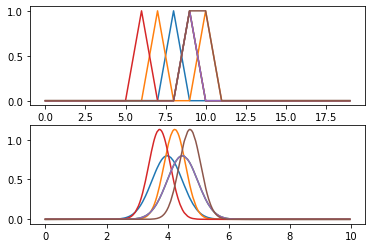

In [171]:
with torch.no_grad():
    nsample =[1,10,20,30,40,50]
    fig,(ax1,ax2) = plt.subplots(2)
    q_x_r = torch.exp(torch.distributions.normal.Normal(mu_dec[nsample,200],torch.sqrt(sigma_dec[nsample,200])).log_prob(x_sorted))
    ax1.plot(range(N),r[nsample,200,:].transpose(0,1))
    ax2.plot(x_sorted,q_x_r)
    #plt.show()
    

range

In [158]:
fig.show()

<ipython-input-158-6ebedab27258>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [129]:
q_x_r

Normal(loc: torch.Size([100, 500]), scale: torch.Size([100, 500]))

In [124]:
mu_dec

tensor([[4.9903e-01, 0.0000e+00, 2.5017e-01,  ..., 0.0000e+00, 9.4581e+00,
         0.0000e+00],
        [1.3036e-03, 0.0000e+00, 2.5017e-01,  ..., 9.4581e+00, 0.0000e+00,
         0.0000e+00],
        [1.3036e-03, 4.9903e-01, 1.3036e-03,  ..., 8.4627e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.3036e-03, 1.2456e+00, 4.9903e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.3036e-03, 4.9903e-01, 2.5017e-01,  ..., 9.4581e+00, 8.9604e+00,
         9.4581e+00],
        [4.9903e-01, 4.9903e-01, 4.9903e-01,  ..., 9.4581e+00, 0.0000e+00,
         9.4581e+00]], grad_fn=<DivBackward0>)